# Data Driven Social Analytics
# Project: The Vent Dataset

We present the Vent dataset, the largest annotated dataset of text, emotions, and social connections to date. It comprises more than 33 millions posts by nearly a million users together with their social connections. 
Each post has an associated emotion. 
There are 705 different emotions, organized in 63 "emotion categories", forming a two-level taxonomy of affects.

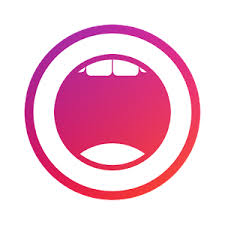

In [1]:
import snap
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import json  
import csv

## Data Preparation

In [2]:
G = nx.read_edgelist("data/vent.edgelist")
metadata = pd.read_csv('data/vents_metadata.csv')
emotions = pd.read_csv('data/emotions.csv')
categories = pd.read_csv('data/emotion_categories.csv')

In [3]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33623414 entries, 0 to 33623413
Data columns (total 4 columns):
emotion_id    object
user_id       object
created_at    object
reactions     int64
dtypes: int64(1), object(3)
memory usage: 1.0+ GB


In [4]:
metadata = metadata.sort_values(['created_at'])

In [5]:
# We create a node id for each unique user. Near 1 million users in total.

nodes = pd.DataFrame({'user_id': metadata['user_id'].drop_duplicates()})
nodes['id']=range(1,len(nodes)+1)
nodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934095 entries, 5157017 to 29605385
Data columns (total 2 columns):
user_id    934095 non-null object
id         934095 non-null int64
dtypes: int64(1), object(1)
memory usage: 21.4+ MB


In [6]:
# Raw edgelist with almost 10 million edges.

edges = nx.to_pandas_edgelist(G,'0','1')
edges.head()

,0,1
0,3aae2d97-0761-445d-9dd4-2879bb38b7b8,d92effc8-8e94-4d39-8e47-5f8fbe69a4ae
1,3aae2d97-0761-445d-9dd4-2879bb38b7b8,e8e8e84d-ec88-4e76-a5bc-c4037ce8598d
2,3aae2d97-0761-445d-9dd4-2879bb38b7b8,27be0679-99fd-3803-84fb-fe77d4097374
3,6d7dd5d2-3f85-42cd-835e-2a4b8dbe843e,f01b03be-518e-4b62-8ac1-0f966fcb0e93
4,66b3300f-ee30-3860-ab07-75b64182b013,91c6614e-90bb-3271-8236-4209fc072651


In [7]:
# We replace the source and target ids in the edgelist with our new node ids

edges = pd.merge(edges, nodes, left_on='0', right_on='user_id')
edges['0'] = edges['id']
del edges['user_id']
del edges['id']
edges = pd.merge(edges, nodes, left_on='1', right_on='user_id')
edges['1'] = edges['id']
del edges['user_id']
del edges['id']
edges.head()

,0,1
0,389701,590118
1,380074,590118
2,600982,590118
3,810616,590118
4,582155,590118


In [8]:
# Save the edges as csv and txt

edges.to_csv('data/edges.txt', sep=',', index = False)
edges.to_csv('data/edges.csv', sep=',', index = False)

In [9]:
# We create a new id for each of the 705 emotions.

emotions['EmotionId']=range(1,len(emotions)+1)
emotions.rename(columns={'name': 'emotion_name'}, inplace=True)
emotions.head()

,id,emotion_category_id,emotion_name,enabled,EmotionId
0,cc0971b3-e423-4ca5-95bb-1bb6d1196a97,abdc8e31-96e9-40f9-8ca7-7a4687986074,Adoring,True,1
1,e96425a8-9841-4433-8177-f4e15e44a823,e7ef5c5b-95d4-4b58-ab23-03376f9ae4e3,🌚 NAUGHTY 🌚,False,2
2,c36ce961-0dea-4929-93cf-f54214fef290,22740139-e807-4bd0-a6aa-0bfc4dcc7dd7,🌈 Supportive 🌈,True,3
3,15507c35-9a8a-469d-9ccb-a841be79fc1c,00e7f090-a2ab-4cf4-ad9f-6b45ebb3cb2b,🌎 Powerful 🌏,True,4
4,1acf46ff-49fc-4d92-9555-3608773ffefc,7db21f2c-f0c8-48e1-8ed3-099124cb5c08,Confused,True,5


In [10]:
# We create a new id for each of the 63 emotion categories.

categories['CategoryId']=range(1,len(categories)+1)
categories.rename(index=str, columns={"name": "category_name"}, inplace=True)
categories.head()

,id,category_name,CategoryId
0,0af046e4-bf8d-4776-8d05-2e5128568330,Anger,1
1,9d5657eb-7719-42af-9055-c845fa35ba02,🧛 Vampire 🧛,2
2,d3bc526b-b869-4e04-b959-d9a6783dc487,✨ Advent ✨,3
3,f40868cf-4839-46cc-9101-81914658375f,🕯️ Trans Remembrance 🕯️,4
4,c105593f-9e96-47e6-9246-d7458f9a6a4b,🐇 Rabbit Day 🐇,5


In [11]:
# We create a new dataset upon the metadata, emotions and categories sets. 
# The idea is to have a clean and readable data set, with new user, emotion and category ids

merged = pd.merge(metadata, nodes, left_on = 'user_id', right_on='user_id')
merged['user_id'] = merged['id']
del merged['id']

merged = pd.merge(merged, emotions, left_on ='emotion_id', right_on='id')
merged['emotion_id'] = merged['EmotionId']
del merged['id']
del merged['EmotionId']

merged = pd.merge(merged, categories, left_on = 'emotion_category_id', right_on = 'id')
merged['emotion_category_id'] = merged['CategoryId']
del merged['id']
del merged['CategoryId']

merged.head()

,emotion_id,user_id,created_at,reactions,emotion_category_id,emotion_name,enabled,category_name
0,134,1,2013-12-17 13:29:06.000,0,15,Sad,True,Sadness
1,134,2,2014-01-01 08:44:40.000,17,15,Sad,True,Sadness
2,134,2,2014-01-07 03:51:00.000,0,15,Sad,True,Sadness
3,134,2,2014-02-07 05:18:38.000,0,15,Sad,True,Sadness
4,134,2,2014-02-11 13:43:09.000,0,15,Sad,True,Sadness


In [12]:
# save merged as csv and json

merged.to_csv('data/metadata_merged.csv', sep=',', index = False)

## Network Analysis

In [2]:
G = snap.LoadEdgeList(snap.PNGraph,"data/edges.csv", 0, 1, ',')

In [3]:
# Giant component

MxWcc = snap.GetMxWcc(G)
print "max wcc nodes %d, edges %d" % \
    (MxWcc.GetNodes(), MxWcc.GetEdges())

max wcc nodes 746333, edges 8653028


In [4]:
snap.SaveEdgeList(MxWcc, 'data/GCCEdges.csv')

In [5]:
snap.PrintInfo(MxWcc, "Vent Stats", "vent-info.txt",  False)
f = open('vent-info.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

Vent Stats: Directed
  Nodes:                    746333
  Edges:                    8653028
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         144601
  Zero OutDeg Nodes:        153705
  NonZero In-Out Deg Nodes: 448027
  Unique directed edges:    8653028
  Unique undirected edges:  8653028
  Self Edges:               839
  BiDir Edges:              839
  Closed triangles:         29819591
  Open triangles:           15086073979
  Frac. of closed triads:   0.001973
  Connected component size: 1.000000
  Strong conn. comp. size:  0.000001
  Approx. full diameter:    11
  90% effective diameter:  3.891798



In [ ]:
numNodes=MxWcc.GetNodes()
D = snap.GetBfsFullDiam(MxWcc, numNodes)
print "diameter", D

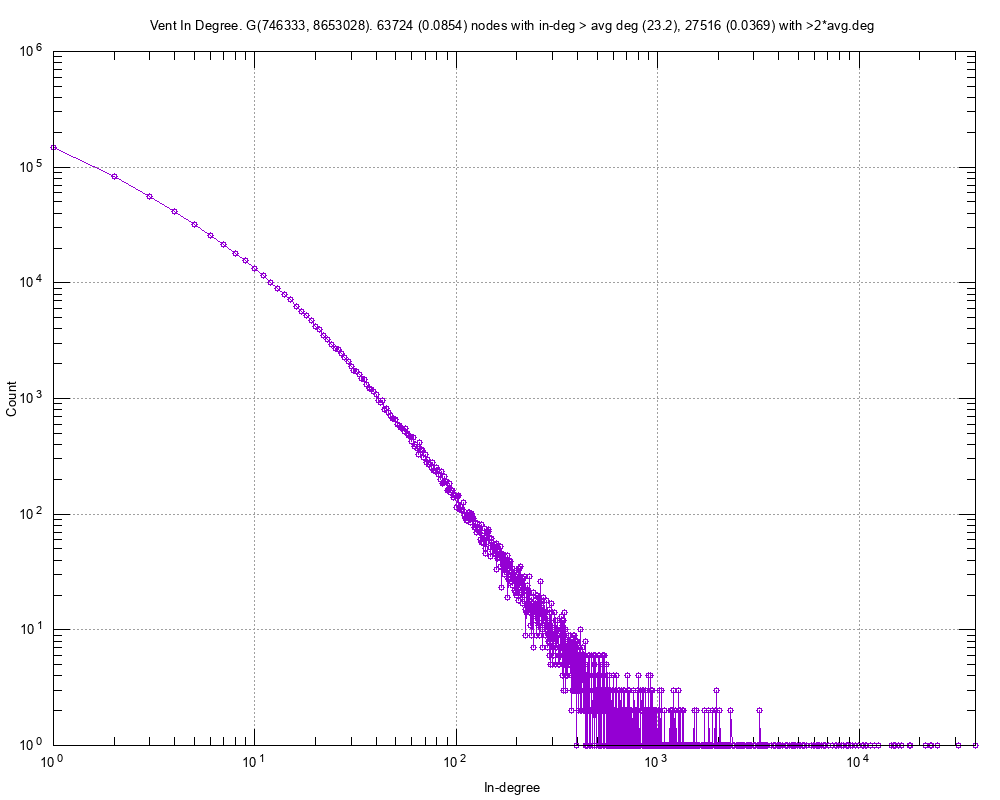

In [4]:
snap.PlotInDegDistr(MxWcc, "Vent", "Vent In Degree")
Image(filename='imgs/inDeg.Vent.png')

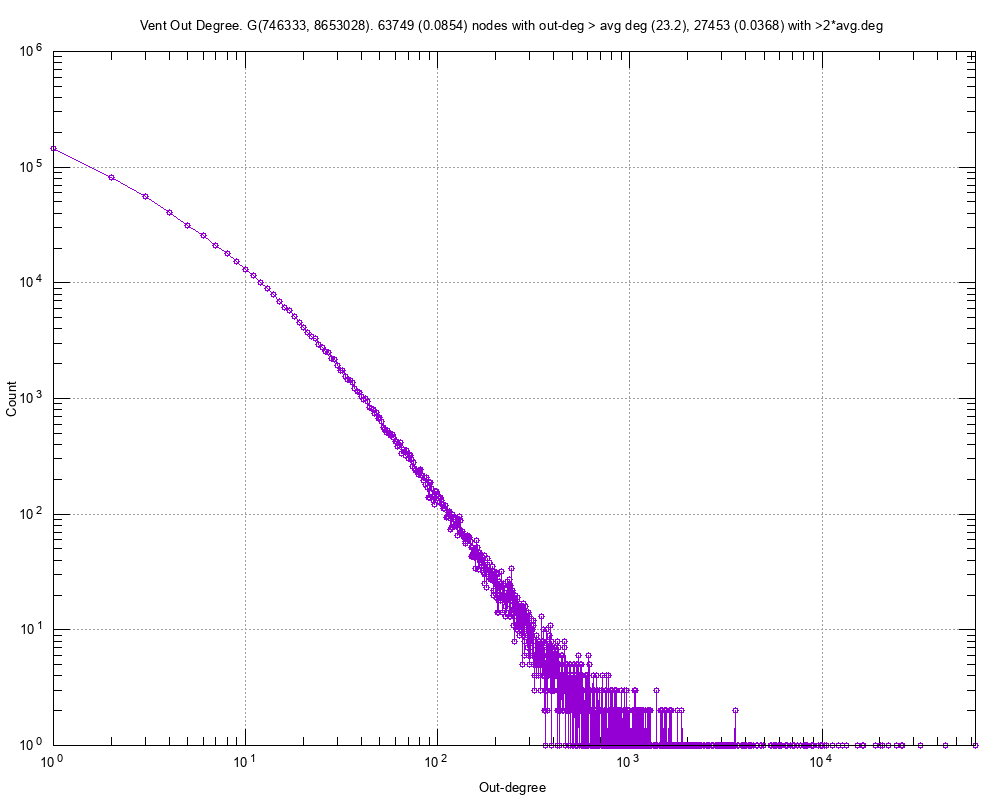

In [5]:
snap.PlotOutDegDistr(MxWcc, "Vent", "Vent Out Degree")
Image(filename='imgs/outDeg.Vent.png')

In [7]:
K=0
while True:
    K = K+1
    KCore = snap.GetKCore(MxWcc, K)
    if KCore.Empty():
        print 'No Core exists for K = %d' % K
        break
    else:
        print 'Core exists for K = %d' % K

Core exists for K = 1
Core exists for K = 2
Core exists for K = 3
Core exists for K = 4
Core exists for K = 5
Core exists for K = 6
Core exists for K = 7
Core exists for K = 8
Core exists for K = 9
Core exists for K = 10
Core exists for K = 11
Core exists for K = 12
Core exists for K = 13
Core exists for K = 14
Core exists for K = 15
Core exists for K = 16
Core exists for K = 17
Core exists for K = 18
Core exists for K = 19
Core exists for K = 20
Core exists for K = 21
Core exists for K = 22
Core exists for K = 23
Core exists for K = 24
Core exists for K = 25
Core exists for K = 26
Core exists for K = 27
Core exists for K = 28
Core exists for K = 29
Core exists for K = 30
Core exists for K = 31
Core exists for K = 32
Core exists for K = 33
Core exists for K = 34
Core exists for K = 35
Core exists for K = 36
Core exists for K = 37
Core exists for K = 38
Core exists for K = 39
Core exists for K = 40
Core exists for K = 41
Core exists for K = 42
Core exists for K = 43
Core exists for K = 

In [ ]:
CoreIDSzV = snap.TIntPrV()
kValue = snap.GetKCoreNodes(MxWcc, CoreIDSzV)
for item in CoreIDSzV:
    print "k-core: %d nodes: %d" % (item.GetVal1(), item.GetVal2())

In [ ]:
for item in CoreIDSzV:
    print "order: %d edges: %d" % (item.GetVal1(), item.GetVal2())

In [6]:
GraphClustCoeff = snap.GetClustCf (MxWcc,-1)
print "Clustering coefficient: %f" % GraphClustCoeff

Clustering coefficient: 0.153645


In [ ]:
numNodes=MxWcc.GetNodes()
eff_diameter, diameter, avgsp = snap.GetBfsEffDiamAll(MxWcc, numNodes, False)
print "Effective Diameter: %f, Diameter: %f, Average Shortest Path: %f" % eff_diameter, diameter, avgsp